In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import display

In [3]:
def func1(x,t):
    return(t-(x*x))

In [40]:
import math

def datagen(n, filename):
    h=n
    tmax=5*2*np.pi
    x=np.array([0])
    v=np.array([1])
    t=0
    i=0

    while(abs(t-tmax) > (h/2)):
        xinit=(x[i]+h*v[i])
        vinit=(v[i]-h*x[i])
        new_x = x[i] + 0.5 * h * (v[i] + vinit)
        new_v = v[i] - 0.5 * h * (x[i] + xinit)
        
        x = np.append(x, new_x)
        v = np.append(v, new_v)
        
        with open(f'{filename}', 'a') as f:
            f.write(str(t)+'\n')
            f.write(str(x[i])+'\n')
            f.write(str(v[i])+'\n')
        t=t+h
        i=i+1
    

In [5]:
def datapreptime(d):
    i=0
    o1=[]
    while i < len(d):
        o1.append(d[i])
        i=i+3
    
    return(np.concatenate(o1))

def dataprepx(d):
    i=1
    o1=[]
    while i < len(d):
        o1.append(d[i])
        i=i+3
    
    return(np.concatenate(o1))

def dataprepy(d):
    i=2
    o1=[]
    while i < len(d):
        o1.append(d[i])
        i=i+3
    
    return(np.concatenate(o1))

In [30]:
def plotec(data, filename):

    fig1 = plt.figure()
    ax1 = fig1.add_subplot()  
    
    l1, = ax1.plot(datapreptime(data), dataprepx(data))
    l2, = ax1.plot(datapreptime(data), dataprepy(data))
    legend = (ax1.legend([l1, l2], ['x', 'v']))
    
    ax1.set_xlim(0, 5*2*np.pi)
    
  

    plt.xlabel("Time (s)")
    plt.ylabel("x")
    plt.savefig(f"{filename}", format="svg")
    
    plt.show()

In [43]:
datagen(0.0005, "e4_0005.txt")

data=pd.read_csv("e4_0005.txt", delimiter='\t', header=None)
data=data.to_numpy()

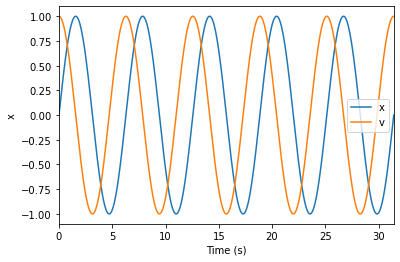

In [44]:
plotec(data, "e4_0005.svg")